# Fit Pixel

In this notebook we will fit a single pixel in a data cube for NGC628.

#### * If you have not yet downloaded the sample data cube, uncomment the below cell and run and download the sample data cube.  
This will save a 900MB file called `sample_data.hdf5` to the **`ExampleData`** directory in the **`LUCI`** folder. Do not be concerned if it takes a few minutes to download.

In [1]:
# !wget -O Data/NGC628_SN3.hdf5  https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/2307000z.hdf5?RUNID=xc9le6u8llecp7fp

In [1]:
# Imports
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

# Get location of LUCI 
path = os.path.abspath(os.path.pardir)  
sys.path.insert(0, path)  # add LUCI to the available paths

from LuciBase import Luci

%config Completer.use_jedi=False  # enable autocompletion when typing in Jupyter notebooks

2022-09-07 09:10:58.546958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-07 09:10:58.546999: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Set the required parameters. We will be using our machine learning algorithm to get the initial guesses - this happens under the hood in `LuciFit`, so that the user is not required to think about the initial guess

In [6]:
# Initialize paths and set parameters
Luci_path = path+'/'
cube_dir = '/mnt/carterrhea/carterrhea/NGC628'  # Full path to data cube
cube_name = 'NGC628_SN3.merged.cm1.1.0'  # don't add .hdf5 extension
object_name = 'NGC628'
redshift = 0.000133  # Redshift of object
resolution = 1000 # The actual resolution is 400, but we don't have ML algorithms for that resolution, so use 1000

Intialize our LUCI object

In [7]:
cube = Luci(Luci_path, cube_dir + '/' + cube_name, cube_dir, object_name, redshift, resolution)

Reading in data...


100%|█████████████████████████████████████████████| 9/9 [01:00<00:00,  6.77s/it]


2022-09-07 09:17:35.769895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-07 09:17:35.769933: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-07 09:17:35.769956: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-09-07 09:17:35.770194: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Create a deep frame

Let's extract a background region and take a look at it. The background region is defined in a ds9 region file in the `ExampleData` folder.

In [8]:
# We use 'mean = True' to take the mean of the emission in the region instead of the sum
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)

100%|█████████████████████████████████████| 2064/2064 [00:00<00:00, 2778.87it/s]


We will now fit a single pixel and take a look at the fit. This fit commands has all the same options as all the other commands except for binning :)

In [9]:
# Fit!
axis, sky, fit_dict = cube.fit_pixel(
    ['Halpha', 'NII6548', 'NII6583', 'SII6716', 'SII6731'],  # lines
    'sincgauss',   # fit function
    [1,1,1,1,1],  # velocity relationship 
    [1,1,1,1,1],  # sigma relationship
    1250, 1045,    # x & y coordinate
    bkg=bkg_sky 
)

And now we can plot the results

(15000.0, 16000.0)

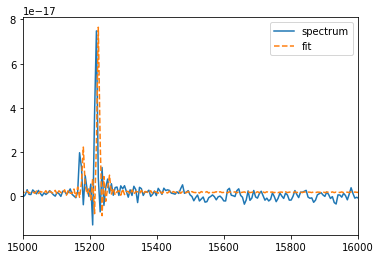

In [10]:
plt.plot(axis, sky, label='spectrum')
plt.plot(axis, fit_dict['fit_vector'], label='fit', linestyle='--')
plt.legend()
plt.xlim(15000, 16000)

And that is it! Congratulations, you have just used `LUCI`! 

In [11]:
fit_dict

{'fit_sol': array([7.38497127e-17, 1.52251607e+04, 2.23821426e+00, 5.99798532e-18,
        1.52595032e+04, 2.24326287e+00, 1.80557362e-17, 1.51774969e+04,
        2.23120732e+00, 8.07079899e-18, 1.48768154e+04, 2.18700486e+00,
        4.70022094e-18, 1.48450321e+04, 2.18233248e+00, 1.87218112e-18]),
 'fit_uncertainties': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'amplitudes': [7.384971266411543e-17,
  5.997985316158626e-18,
  1.8055736223754507e-17,
  8.070798994922608e-18,
  4.700220935077693e-18],
 'fluxes': [2.6772451645843255e-16,
  2.1745937130295308e-17,
  6.544979705059082e-17,
  2.923622174233243e-17,
  1.7025223934497343e-17],
 'flux_errors': [0.0, 0.0, 0.0, 0.0, 0.0],
 'chi2': 1.2146766891590665e-16,
 'velocities': [240.97280883791495,
  240.97280883789995,
  240.9728088379013,
  240.97280883787417,
  240.97280883790944],
 'sigmas': [18.715528237370073,
  18.715528237370073,
  18.715528237370076,
  18.715528237370076,
  18.715528237370076],
 'v